In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi

In [3]:
subset = ['test', 'test_N', 'difference', 'bca_low', 'bca_high']
DMSO_dat = pd.read_csv('D:/_2021_08_screen/analysis/S1mdiff_150_DMSO.csv', usecols=subset, index_col=0)
DMSO_dat =DMSO_dat.sort_values('difference').reset_index()
DMSO_dat.head()

,test,test_N,difference,bca_low,bca_high
0,1-octanol,652,-7.446258,-8.944625,-5.916856
1,Phytol,625,-6.248916,-7.800290,-4.622622
2,2-nonanone,867,-4.575976,-6.020000,-3.096992
3,Ellagic acid,1101,-4.205057,-5.603935,-2.882264
4,Salvinorin A Propionate,926,-3.313405,-4.793185,-1.846934


In [5]:
comp_ordr = list(DMSO_dat['test'])


In [6]:
lines = []
for index, row in DMSO_dat.iterrows():
    line = ((row['bca_low'], index), (row['bca_high'], index))
    lines.append(line)


In [7]:
r = [] #Creating an empty list to hold row values
r = list(range(0,8)) # Adding row values
r = list(np.repeat(r, [12], axis=0))# Extending the list of row values for all 96 conditions


In [8]:
c = [] #Creating an empty list to hold column values
c = list(range(0,12)) # Adding appropriate PCR plate column values
c = c*8  # Extending the list of numbers to accomodate 96 conditions
print(len(c))

96


In [10]:

DMSO_dat['Column'] = c[0:len(DMSO_dat)] # Adding column values to the randomized/shuffled df of compounds
DMSO_dat['Row'] = r[0:len(DMSO_dat)] # Adding row values to the randomized/shuffled df of compounds
DMSO_dat.head()

,test,test_N,difference,bca_low,bca_high,Column,Row
0,1-octanol,652,-7.446258,-8.944625,-5.916856,0,0
1,Phytol,625,-6.248916,-7.800290,-4.622622,1,0
2,2-nonanone,867,-4.575976,-6.020000,-3.096992,2,0
3,Ellagic acid,1101,-4.205057,-5.603935,-2.882264,3,0
4,Salvinorin A Propionate,926,-3.313405,-4.793185,-1.846934,4,0


In [11]:
tick_labels = list(DMSO_dat['test'])
positions = list(range(0,95))
mdiffs = list(DMSO_dat['difference'])
x_positions = [-10, -5, 0, 5, 10, 15, 20]
xtick_labels =  [-10, -5, 0, 5, 10, 15, 20]

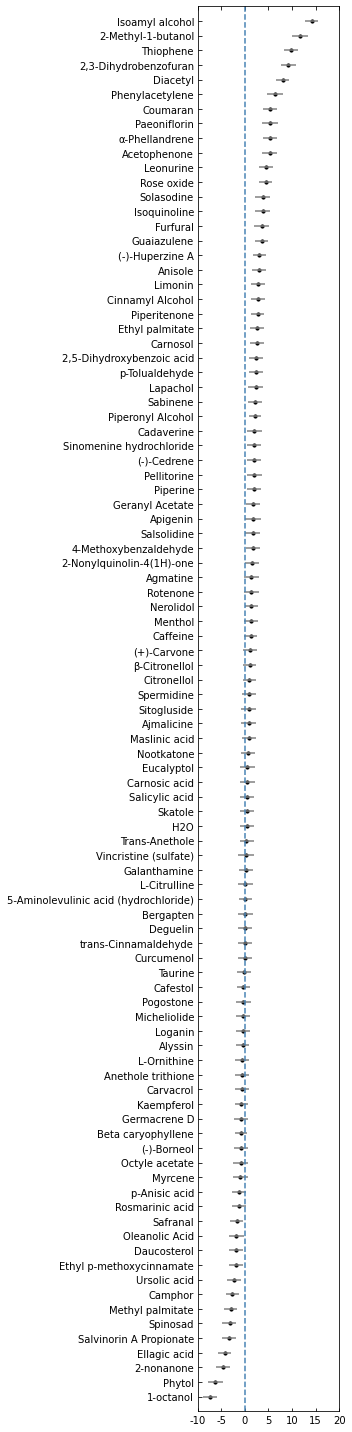

In [91]:
fig, ax = plt.subplots(figsize=(5,20)) 

ln_coll = mpl.collections.LineCollection(lines, colors='gray')
ax = plt.gca()
plt.yticks(positions, tick_labels)
plt.xticks(x_positions, xtick_labels)

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_ticks_position('both')
#minor_locator = AutoMinorLocator(5)
#ax.xaxis.set_minor_locator(minor_locator)
ax.add_collection(ln_coll)
ax.scatter(mdiffs, positions, s=10, c='black')
ax.tick_params(axis='both', tickdir='in')
plt.axvline(0, ls='--', c='steelblue')
ax.set_xlim(-10, 20)    
ax.set_ylim(-1, 95)
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('D:/NP_manuscript/DMSO_mdiff_vertical.svg')

In [99]:
h2o_dat = pd.read_csv('D:/_2021_08_screen/analysis/S1mdiff_150_h2o.csv', usecols=subset, index_col=0)
h2o_dat =h2o_dat.sort_values('difference').reset_index()
h2o_dat = h2o_dat.set_index('test')

In [112]:
h2o_ord = ['DMSO' if x=='H2O' else x for x in comp_ordr]


In [113]:
reordered_h2o = h2o_dat.reindex(h2o_ord)
reordered_h2o = reordered_h2o.reset_index()
reordered_h2o
#h2o_dat = h2o_dat.reset_index()

,test,test_N,difference,bca_low,bca_high
0,1-octanol,652,-7.864674,-9.412386,-6.307701
1,Phytol,625,-6.667332,-8.326055,-4.998785
2,2-nonanone,867,-4.994392,-6.570856,-3.472582
3,Ellagic acid,1101,-4.623473,-6.101015,-3.260045
4,Salvinorin A Propionate,926,-3.731821,-5.300717,-2.233021
...,...,...,...,...,...
90,Diacetyl,796,7.600365,6.171452,9.054839
91,"2,3-Dihydrobenzofuran",705,8.776051,7.164180,10.309801
92,Thiophene,706,9.341482,7.722647,10.902977
93,2-Methyl-1-butanol,381,11.293831,9.436491,12.980729


In [119]:
h2o_lines = []
for index, row in reordered_h2o.iterrows():
    h2o_line = ((row['bca_low'], index), (row['bca_high'], index))
    h2o_lines.append(h2o_line)


In [120]:
h2o_tick_labels = list(reordered_h2o['test'])
h2o_mdiffs = list(reordered_h2o['difference'])
h2o_tick_labels

['1-octanol',
 'Phytol',
 '2-nonanone',
 'Ellagic acid',
 'Salvinorin A Propionate',
 'Spinosad',
 'Methyl palmitate',
 'Camphor',
 'Ursolic acid',
 'Ethyl p-methoxycinnamate',
 'Daucosterol',
 'Oleanolic Acid',
 'Safranal',
 'Rosmarinic acid',
 'p-Anisic acid',
 'Myrcene',
 'Octyle acetate',
 '(-)-Borneol',
 'Beta caryophyllene',
 'Germacrene D',
 'Kaempferol',
 'Carvacrol',
 'Anethole trithione',
 'L-Ornithine',
 'Alyssin',
 'Loganin',
 'Micheliolide',
 'Pogostone',
 'Cafestol',
 'Taurine',
 'Curcumenol',
 'trans-Cinnamaldehyde',
 'Deguelin',
 'Bergapten',
 '5-Aminolevulinic acid (hydrochloride)',
 'L-Citrulline',
 'Galanthamine',
 'Vincristine (sulfate)',
 'Trans-Anethole',
 'DMSO',
 'Skatole',
 'Salicylic acid',
 'Carnosic acid',
 'Eucalyptol',
 'Nootkatone',
 'Maslinic acid',
 'Ajmalicine',
 'Sitogluside',
 'Spermidine',
 'Citronellol',
 'β-Citronellol',
 '(+)-Carvone',
 'Caffeine',
 'Menthol',
 'Nerolidol',
 'Rotenone',
 'Agmatine',
 '2-Nonylquinolin-4(1H)-one',
 '4-Methoxybenzal

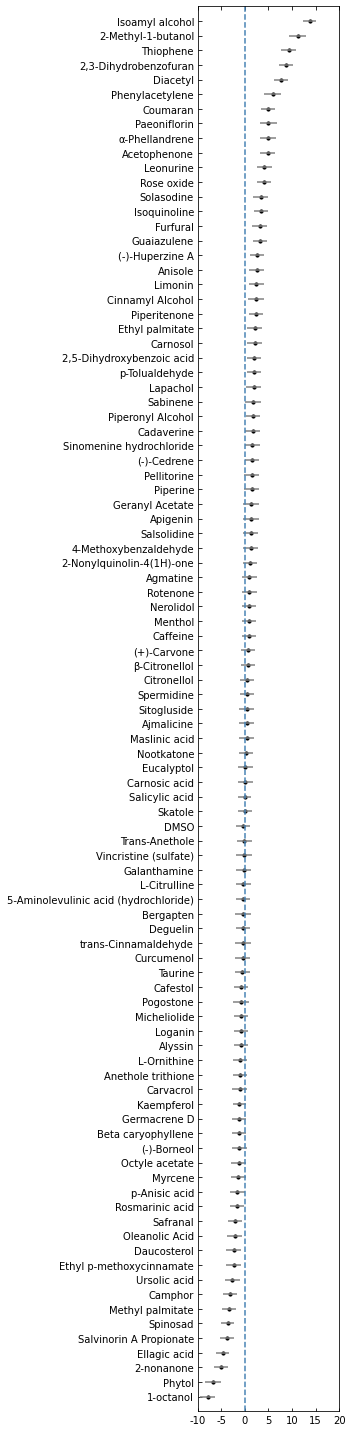

In [116]:
fig, ax = plt.subplots(figsize=(5,20)) 

hln_coll = mpl.collections.LineCollection(h2o_lines, colors='gray')
ax = plt.gca()
plt.yticks(positions, h2o_tick_labels)
plt.xticks(x_positions, xtick_labels)

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_ticks_position('both')
#minor_locator = AutoMinorLocator(5)
#ax.xaxis.set_minor_locator(minor_locator)
ax.add_collection(hln_coll)
ax.scatter(h2o_mdiffs, positions, s=10, c='black')
ax.tick_params(axis='both', tickdir='in')
plt.axvline(0, ls='--', c='steelblue')
ax.set_xlim(-10, 20)    
ax.set_ylim(-1, 95)
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('D:/NP_manuscript/h2o_mdiff_vertical.svg')

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


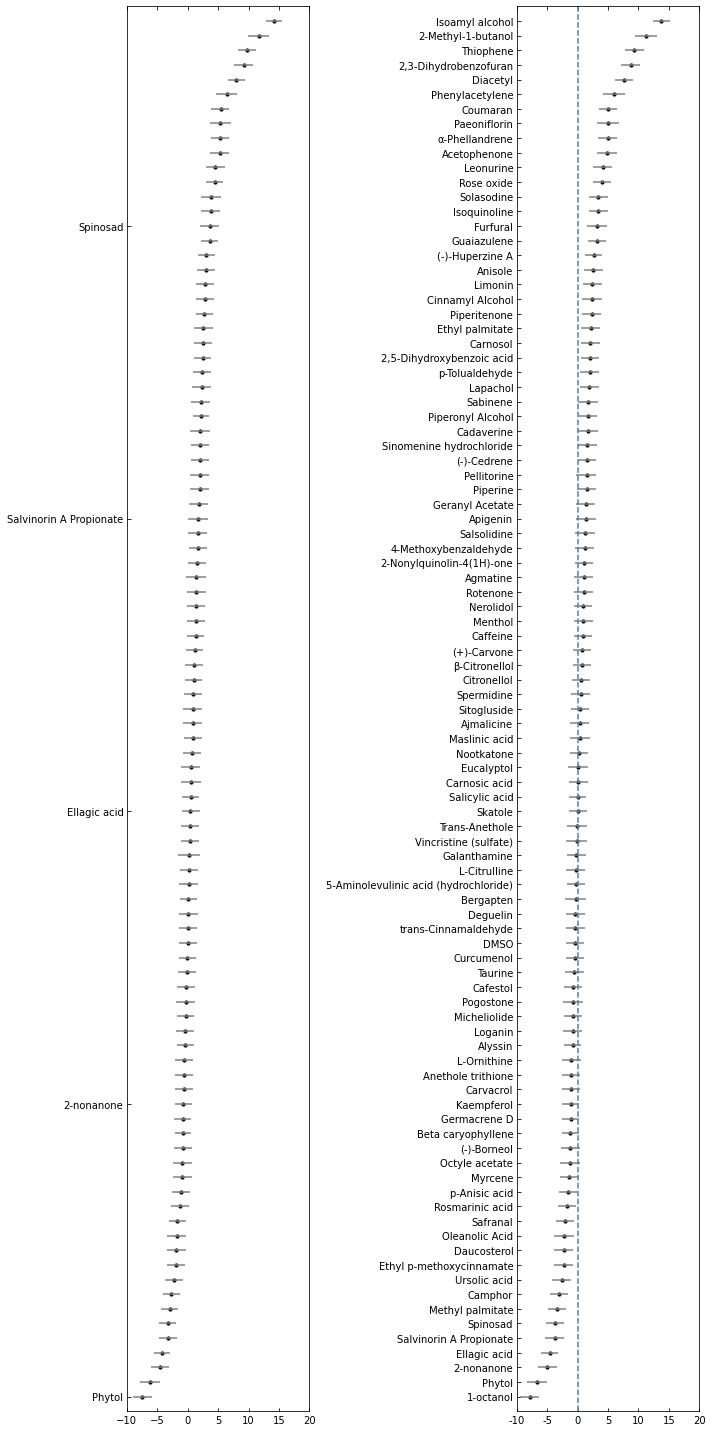

In [83]:
fig, ax = plt.subplots(figsize=(10,20), nrows=1, ncols=2, ) 

hln_coll = mpl.collections.LineCollection(h2o_lines, colors='gray')
ln_coll = mpl.collections.LineCollection(lines, colors='gray')

#ax[0] = plt.gca()
ax[0].xaxis.set_ticks_position('both')
ax[0].add_collection(ln_coll)
ax[0].scatter(mdiffs, positions, s=10, c='black')
ax[0].set_yticklabels(tick_labels)
ax[0].tick_params(axis='both', tickdir='in')
ax[0].set_xlim(-10, 20)    
ax[0].set_ylim(-1, 95)

#ax[1] = plt.gca()
ax[1].xaxis.set_ticks_position('both')
ax[1].add_collection(hln_coll)
ax[1].scatter(h2o_mdiffs, positions, s=10, c='black')
ax[1].set_yticklabels(h2o_tick_labels)
ax[1].tick_params(axis='both', tickdir='in')
ax[1].set_xlim(-10, 20)    
ax[1].set_ylim(-1, 95)

plt.axvline(0, ls='--', c='steelblue')
plt.yticks(positions)
plt.xticks(x_positions, xtick_labels)
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('D:/NP_manuscript/mdiff_vertical.svg')

In [ ]:
ln_coll = matplotlib.collections.LineCollection(lines)

ax = plt.gca()
ax.add_collection(ln_coll)
ax.set_xlim(-10, 10)    
ax.set_ylim(0, 96)
plt.draw()

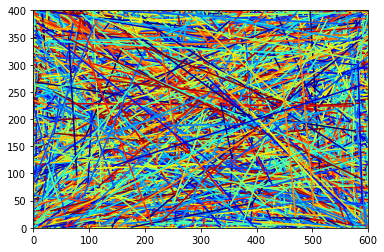

In [62]:
import matplotlib
import matplotlib.pyplot as plt    
import random


s = (600,400)
N = 100000

segs = []
colors = []
my_cmap = plt.get_cmap('jet')
for i in range(N):
    x1 = random.random() * s[0]
    y1 = random.random() * s[1]
    x2 = random.random() * s[0]
    y2 = random.random() * s[1]
    c  = random.random()
    colors.append(my_cmap(c))
    segs.append(((x1, y1), (x2, y2)))

ln_coll = matplotlib.collections.LineCollection(segs, colors=colors)

ax = plt.gca()
ax.add_collection(ln_coll)
ax.set_xlim(0, 600)    
ax.set_ylim(0, 400)
plt.draw()

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


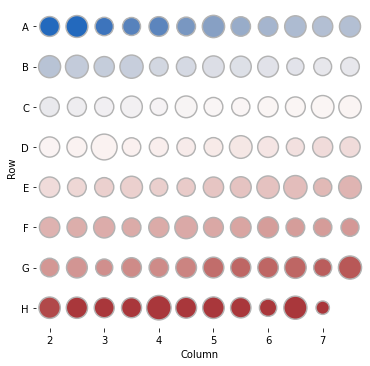

In [38]:

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=dat,
    x="Column", y="Row", hue='difference', size=(dat['bca_high']-dat['bca_low']),
    palette="vlag", hue_norm=(-5, 5), edgecolor=".7",
    height=5, sizes=(100, 800), size_norm=(2.5, 3.75),
)

#cax = g.fig.add_axes([.92, .12, .02, .8])


# Tweak the figure to finalize
g.set(xlim=(-.5,11.5), ylim=(7.5,-.5))
g.ax.set_xticklabels(xlabels)
g.ax.set_yticklabels(ylabels)
g.despine(left=True, bottom=True)
g.ax.margins(.02)
g.legend.set_visible(False)
g.savefig('D:/NP_manuscript/mean_diff.png', dpi = 300)

#g.colorbar()



In [60]:
lines

[[(-8.944624989468686, 0), (-5.9168555438753705, 0)],
 [(-7.800289802496879, 1), (-4.622621660923844, 1)],
 [(-6.019999506456029, 2), (-3.09699237220775, 2)],
 [(-5.535870081513516, 3), (-2.637354335932095, 3)],
 [(-5.508219460443353, 4), (-2.496946355133813, 4)],
 [(-4.793185297198695, 5), (-1.8469337811402056, 5)],
 [(-4.595810988383165, 6), (-1.38749025053429, 6)],
 [(-4.042649817235667, 7), (-1.0462519521871696, 7)],
 [(-3.737299600753583, 8), (-0.7365205985448058, 8)],
 [(-3.6136881973042745, 9), (-0.4732923989244214, 9)],
 [(-3.417840332947663, 10), (-0.3729702005731848, 10)],
 [(-3.4296487017161383, 11), (-0.3171231436450703, 11)],
 [(-3.393989208267063, 12), (-0.2065655336651102, 12)],
 [(-3.1361316495827585, 13), (0.119797307172425, 13)],
 [(-3.0308339134244147, 14), (0.0185263102997863, 14)],
 [(-3.1034331528045893, 15), (0.1786027645784177, 15)],
 [(-2.624243577973822, 16), (0.3143596212741886, 16)],
 [(-2.525552107352464, 17), (0.4717178021467829, 17)],
 [(-2.45517014249093

In [27]:
def plt_ellipse(major, minor):
    t = np.linspace(0,360,360)
    x = abs(minor)*np.cos(np.radians(t)) #10 is minor axis of ellipse
    y = abs(major)*np.sin(np.radians(t))#50 is major axis of ellipse
    return x, y

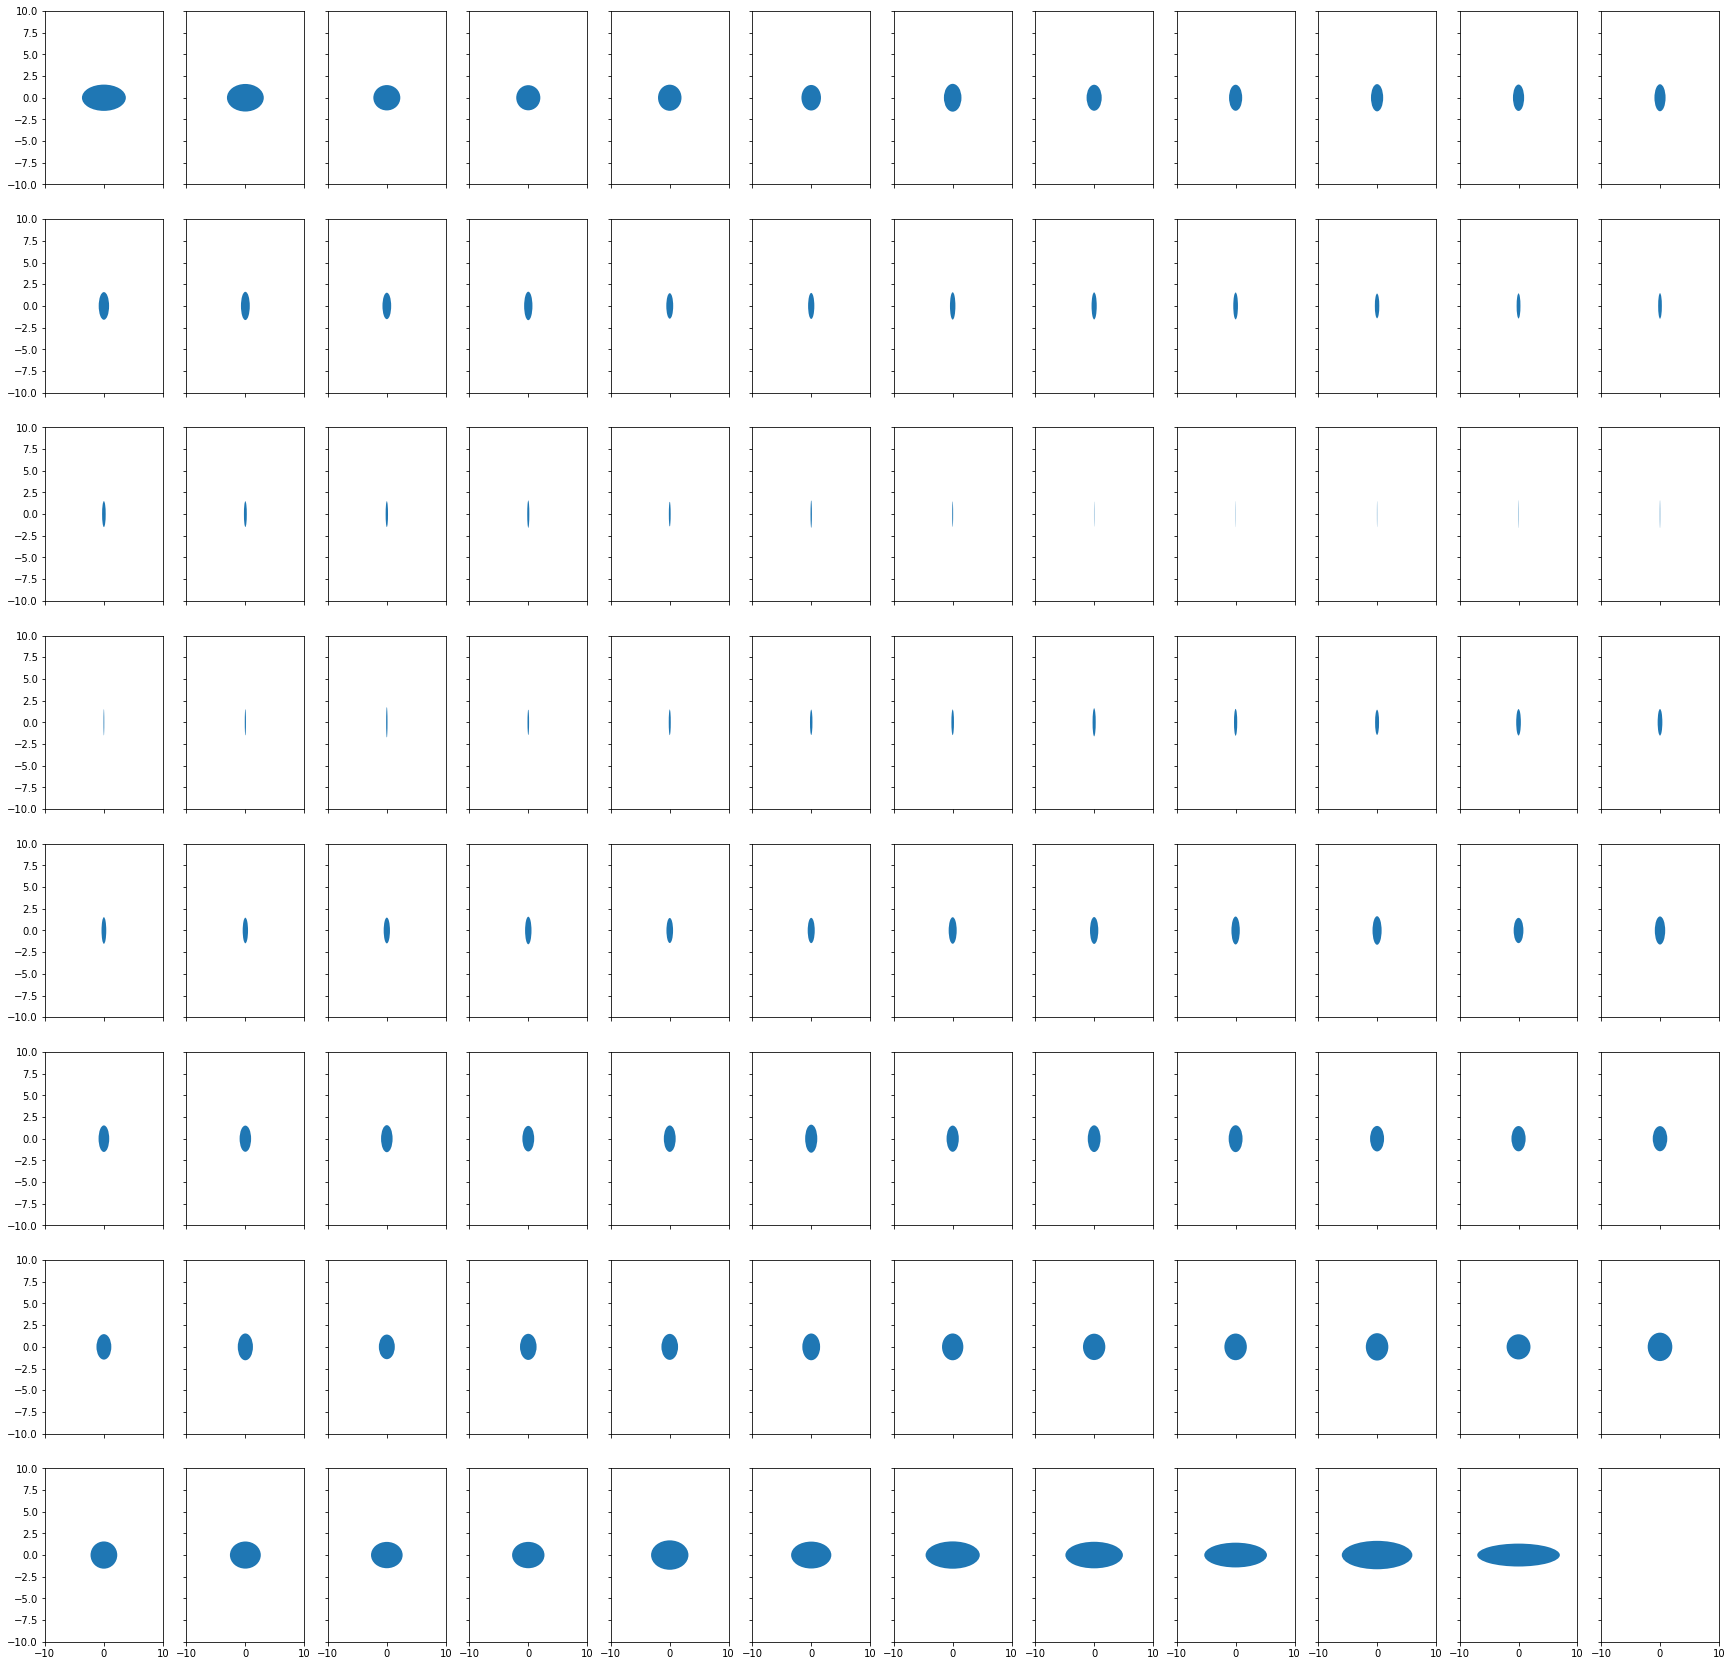

In [39]:
fig, ax = plt.subplots(nrows=8, ncols=12, figsize=(30,30), sharex=True, sharey=True)

for index, row in dat.iterrows():
    i = row['Row']
    j = row['Column']
    e = Ellipse((0,0), row['difference'], row['var'])
    
    ax[i,j].add_artist(e)
    e.set_clip_box(ax[i,j].bbox)

    ax[i,j].set_xlim(-10, 10)
    ax[i,j].set_ylim(-10, 10)
plt.savefig('D:/NP_manuscript/width_md.png', dpi=300)



In [45]:
t = np.linspace(0,360,360)
x = 10*np.cos(np.radians(t)) #10 is minor axis of ellipse
y = 50*np.sin(np.radians(t))#50 is major axis of ellipse
print(len(x))
print(len(y))

360
360
